In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np


In [2]:

# 1. Create a quantum circuit with 2 qubits and 1 classical bit
qc = QuantumCircuit(2,2)



In [3]:
# 2. Prepare a Bell state (|00⟩ + |11⟩)/√2
qc.h(0)  # Apply Hadamard to Qubit 0
qc.cx(0, 1)  # Apply CNOT with Qubit 0 as control and Qubit 1 as target

# At this point, the state is the Bell state (|00⟩ + |11⟩)/√2
qc.measure_all() 
qc.draw()  # Draw the circuit

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
   c: 2/══════════════╬══╬═
                      ║  ║ 
meas: 2/══════════════╩══╩═
                      0  1

In [4]:
# 3. Introduce a probabilistic error (X gate on one qubit)
if np.random.rand() < 0.2:  # 20% chance
    if np.random.rand() < 0.5:  # 50% chance of applying to Qubit 0
        qc.x(0)
        print("Applied X gate to Qubit 0")
    else:  # 50% chance of applying to Qubit 1
        qc.x(1)
        print("Applied X gate to Qubit 1")

else:
    print("No error applied")


No error applied


Measurement counts for Qubit 0: {'11 01': 500, '00 00': 500}
Probability of measuring '0': 0.00
Probability of measuring '1': 0.00
The measurement of Qubit 0 is significantly biased.
This suggests the entanglement might still have some influence, or no error was applied.


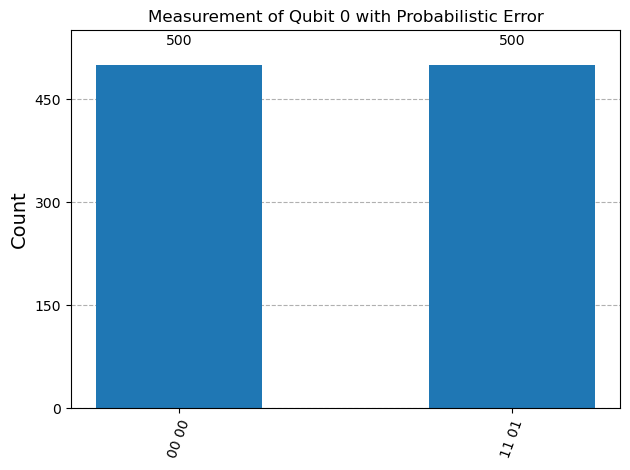

In [5]:

# 4. Measure only Qubit 0
qc.measure(0, 0)  # Measure Qubit 0 and store the result in classical bit 0

# 5. Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

# Run the simulation with 1000 shots
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(qc)

# 6. Print the counts
print("Measurement counts for Qubit 0:", counts)

# 7. Analyze if the output is random (approximately 50/50)
total_counts = sum(counts.values())
prob_0 = counts.get('0', 0) / total_counts
prob_1 = counts.get('1', 0) / total_counts

print(f"Probability of measuring '0': {prob_0:.2f}")
print(f"Probability of measuring '1': {prob_1:.2f}")

if 0.4 <= prob_0 <= 0.6 and 0.4 <= prob_1 <= 0.6:
    print("The measurement of Qubit 0 appears to be approximately random (50/50).")
    print("This suggests the entanglement might have been broken by the error.")
else:
    print("The measurement of Qubit 0 is significantly biased.")
    print("This suggests the entanglement might still have some influence, or no error was applied.")

# You can optionally plot the histogram
plot_histogram(counts, title="Measurement of Qubit 0 with Probabilistic Error")